In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import datetime

In [211]:
ipo = pd.read_csv('IPOScoop_Track_Record.csv',encoding='latin-1')

In [212]:
ipo = ipo.applymap(lambda x :x.replace('$','') if '$' in str(x) else x)

In [213]:
ipo = ipo.applymap(lambda x:x.replace('%','') if '%' in str(x) else x)

In [214]:
ipo = ipo.applymap(lambda x: x.replace('(','-') if '(' in str(x) else x)

In [215]:
ipo = ipo.applymap(lambda x: x.replace(')','') if ')' in str(x) else x)

In [216]:
ipo.head()

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day% Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,2/3/16,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN
1,2/3/16,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN
2,2/11/16,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,-1.98,-1.95,2,Missed
3,2/11/16,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,-1.36,1,NaN
4,2/24/16,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN


In [217]:
ipo[ipo['Trade Date']=='11/120']['Trade Date'] = '2012-11-20'

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [218]:
ipo[ipo['Trade Date']=='11/120']

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day% Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
864,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.00,17.00,18.40,15.00,1.00,2.40,1,NaN


In [219]:
ipo.loc[864,'Trade Date'] = '11/20/2012'

In [220]:
ipo['Trade Date'] = pd.to_datetime(ipo['Trade Date'])

In [221]:
ipo.replace('N/C', 0, inplace = True)

In [222]:
ipo['Offer Price'] = ipo['Offer Price']. astype(float)
ipo['Opening Price'] = ipo['Opening Price'].astype(float)
ipo['1st Day Close'] = ipo['1st Day Close'].astype(float)
ipo['$ Change Opening'] = ipo['$ Change Opening'].astype(float)
ipo['$ Change Close'] = ipo['$ Change Close'].astype(float)
ipo['Star Ratings'] = ipo['Star Ratings'].astype(int)
ipo['1st Day% Px Chng '] = ipo['1st Day% Px Chng '].astype(float)

In [223]:
ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 12 columns):
Trade Date                  2729 non-null datetime64[ns]
Issuer                      2729 non-null object
Symbol                      2729 non-null object
Lead/Joint-Lead Managers    2729 non-null object
Offer Price                 2729 non-null float64
Opening Price               2729 non-null float64
1st Day Close               2729 non-null float64
1st Day% Px Chng            2729 non-null float64
$ Change Opening            2729 non-null float64
$ Change Close              2729 non-null float64
Star Ratings                2729 non-null int64
Performed                   310 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 255.9+ KB


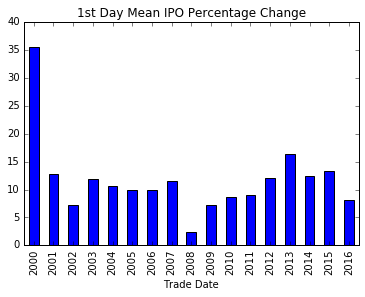

In [224]:
#averaging first day percentage gain
ipo.groupby(ipo['Trade Date'].dt.year)['1st Day% Px Chng '].mean().plot(kind = 'bar',color = 'b',title = '1st Day Mean IPO Percentage Change')

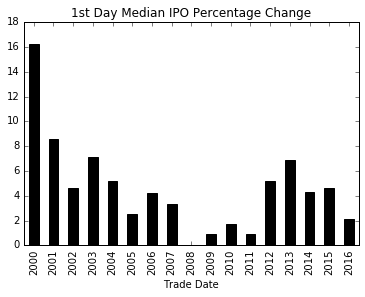

In [225]:
ipo.groupby(ipo['Trade Date'].dt.year)['1st Day% Px Chng '].median().plot(kind = 'bar',color = 'k',title = '1st Day Median IPO Percentage Change')

In [226]:
df = pd.DataFrame(ipo.groupby(ipo['Trade Date'].dt.year)['1st Day% Px Chng '].mean())
df1 = pd.DataFrame(ipo.groupby(ipo['Trade Date'].dt.year)['1st Day% Px Chng '].median())

In [227]:
df = pd.concat([df,df1],axis = 1)

In [228]:
df.columns = ['Mean','Median']

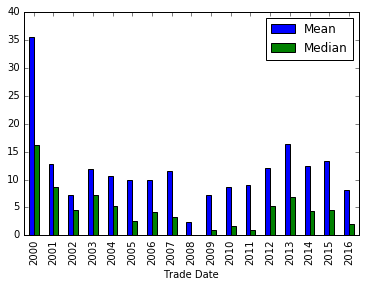

In [229]:
df.plot(kind = 'bar')

In [230]:
ipo['1st Day% Px Chng '].describe()

count    2729.000000
mean       13.202843
std        27.782607
min       -35.220000
25%         0.000000
50%         4.550000
75%        19.050000
max       353.850000
Name: 1st Day% Px Chng , dtype: float64

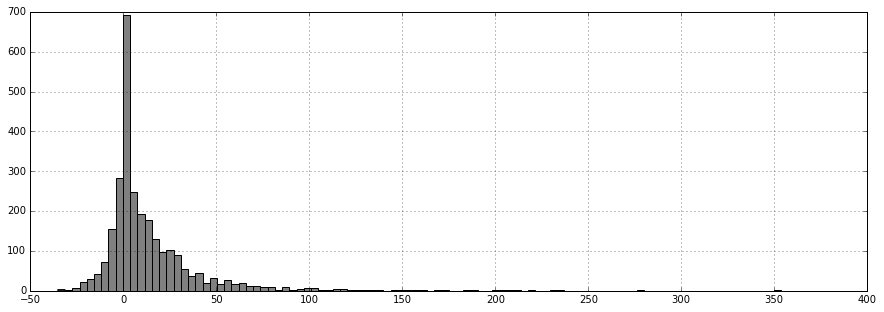

In [231]:
ipo['1st Day% Px Chng '].hist(bins = 100,figsize = (15,5),color = 'grey')

In [232]:
ipo['$ chn open to close'] = ipo['1st Day Close']-ipo['Opening Price']
ipo['% chn open to close'] = ipo['$ chn open to close']/ipo['Opening Price']*100

In [233]:
ipo['% chn open to close'].describe()

count    2729.000000
mean        1.376326
std        10.792156
min       -49.281222
25%        -2.820513
50%         0.000000
75%         4.050000
max       159.417476
Name: % chn open to close, dtype: float64

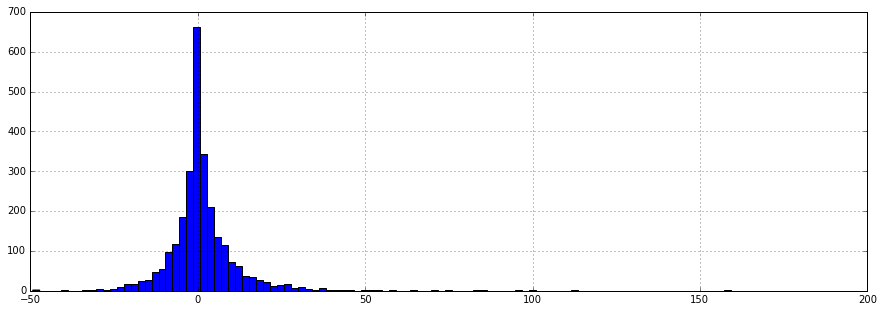

In [234]:
ipo['% chn open to close'].hist(bins=100,figsize = (15,5))

In [235]:
ipo[ipo['Trade Date']>='2016-01-01']['$ chn open to close'].describe()

count    51.000000
mean     -0.027059
std       1.266872
min      -3.870000
25%      -0.470000
50%       0.000000
75%       0.200000
max       4.800000
Name: $ chn open to close, dtype: float64

In [236]:
ipo[(ipo['Trade Date']>='2016-01-01')&(ipo['$ chn open to close']>=0)]['% chn open to close'].describe()

count    27.000000
mean      3.788447
std       6.207674
min       0.000000
25%       0.310514
50%       1.587302
75%       2.973666
max      23.869801
Name: % chn open to close, dtype: float64

In [237]:
ipo[(ipo['Trade Date']>='2016-01-01')&(ipo['$ chn open to close']<0)]['% chn open to close'].describe()

count    24.000000
mean     -5.679639
std       5.701152
min     -20.368421
25%      -7.856833
50%      -3.476374
75%      -1.446809
max      -0.040000
Name: % chn open to close, dtype: float64

In [238]:
ipo[(ipo['Trade Date']>='2016-01-01')&(ipo['$ chn open to close']>=0)]['% chn open to close'].sum()

102.28808235341049

In [239]:
ipo[(ipo['Trade Date']>='2016-01-01')&(ipo['$ chn open to close']<0)]['% chn open to close'].sum()

-136.31134429274297

In [240]:
sp = pd.read_csv('sp500.csv')

In [241]:
sp.sort_values('Date', ascending = True, inplace =True)

In [242]:
sp.reset_index(inplace = True,drop = True)

In [243]:
#sp['Date'] = pd.to_datetime(sp['Date'])
ipo.sort_values('Trade Date',ascending = True, inplace = True)
ipo.reset_index(inplace = True, drop = True)

In [244]:
change = []
err = []
for date in ipo['Trade Date']:
    if str(date.date()) in sp['Date'].tolist():
        day_ago_idx = sp[sp['Date'] == str(date.date())].index[0]-1
        week_ago_idx = sp[sp['Date'] == str(date.date())].index[0] -8
        ch = (sp.iloc[day_ago_idx]['Close'] - sp.iloc[week_ago_idx]['Close'])/sp.iloc[week_ago_idx]['Close']
        change.append(ch*100)
    else:
        err.append(str(date.date()))
err

['2009-08-01', '2013-11-16', '2015-02-21', '2015-02-21']

def get_week_change(ipodate):
    try:
        if str(date.date()) in sp['Date'].tolist():
            day_ago_idx = sp[sp['Date'] == str(ipodate.date())].index[0]-1
            week_ago_idx = sp[sp['Date'] == str(ipodate.date())].index[0] -8
            change = sp.iloc[day_ago_idx]['Close'] - sp.iloc[week_ago_idx]['Close']/sp.iloc[week_ago_idx]['Close']
            return change*100
    except:
        print('error', sp['Date'])
ipo['SP week change %'] = ipo['Trade Date'].map(get_week_change)

In [245]:
ipo.loc[ipo[ipo['Trade Date'] == '2009-08-01'].index[0],'Trade Date'] = pd.to_datetime('2009-08-12')
ipo.loc[ipo[ipo['Trade Date'] == '2013-11-16'].index[0],'Trade Date'] = pd.to_datetime('2012-11-20')
ipo.loc[ipo[ipo['Trade Date'] == '2015-02-21'].index[0],'Trade Date'] = pd.to_datetime('2015-05-21')
ipo.loc[ipo[ipo['Trade Date'] == '2015-02-21'].index[0],'Trade Date'] = pd.to_datetime('2015-05-21')

In [252]:
def get_week_change(ipodate):
    try:
        day_ago_idx = sp[sp['Date'] == str(ipodate.date())].index[0]-1
        week_ago_idx = sp[sp['Date'] == str(ipodate.date())].index[0] -8
        change = (sp.iloc[day_ago_idx]['Close'] - sp.iloc[week_ago_idx]['Close'])/sp.iloc[week_ago_idx]['Close']            
        return change*100
    except:
        print('error', sp['Date'])
ipo['SP week change %'] = ipo['Trade Date'].map(get_week_change)

In [254]:
def get_day_change(ipodate):
    try:
        day_ago_idx = sp[sp['Date'] == str(ipodate.date())].index[0]
        week_ago_idx = sp[sp['Date'] == str(ipodate.date())].index[0] -1
        change = (sp.iloc[day_ago_idx]['Close'] - sp.iloc[week_ago_idx]['Close'])/sp.iloc[week_ago_idx]['Close']            
        return change*100
    except:
        print('error', sp['Date'])
ipo['SP Close to Open change %'] = ipo['Trade Date'].map(get_day_change)
ipo.head()

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day% Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ chn open to close,% chn open to close,SP week change %,SP Close to Open change %
0,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.78,2.25,2.06,2,NaN,-0.19,-1.853659,-2.660599,0.934068
1,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.00,20.00,31.00,3,NaN,11.00,27.500000,1.659212,-0.731461
2,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.57,0.03,0.06,1,NaN,0.03,0.271985,1.659212,-0.731461
3,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.61,-0.13,-2.59,1,NaN,-2.47,-20.791246,1.659212,-0.731461
4,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.00,1.50,4.00,2,NaN,2.50,21.739130,1.659212,-0.731461


In [257]:
ipo['Lead Mgr'] = ipo['Lead/Joint-Lead Managers'].map(lambda x:
x.split('/')[0])
ipo['Lead Mgr'] = ipo['Lead Mgr'].map(lambda x: x.strip())

In [262]:
ipos = ipo
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'
ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'
ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'
ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'
ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'
ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'
ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'
#ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'
ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'
ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'
ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'
ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler Oneil + Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler ONeil + Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'
ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'
ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'
ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'
ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'
ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'
ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'
ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'
ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'
ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'
ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'
ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'
ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'
ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'
ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMPSecurities'
ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'
ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'
ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'
ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'
ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'
ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'
ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'
ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'
ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'
ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'
ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'
ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr'] = 'Cohen & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr'] = 'Leerink Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [273]:
ipos['total underwriters'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: len(x.split('/')))

In [275]:
ipos['Week Day'] = ipos['Trade Date'].dt.dayofweek.map({0:'Mon', 1:'Tues',2:'Wed',3:'Thrs',4:'Fir',5:'Sat',6:'Sun'})

In [277]:
ipos['Month'] = ipos['Trade Date'].map(lambda x: x.month).map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
5:'May', 6:'Jun',7:'Jul',\
8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [281]:
ipos['Gap Open Pct'] = (ipos['$ Change Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100
ipos['Open to Close Pct'] = (ipos['$ Change Close'].astype('float') -ipos['$ Change Opening'].astype('float'))/ipos['Opening Price'].astype('float') * 100
ipos.head()

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day% Px Chng,$ Change Opening,$ Change Close,...,$ chn open to close,% chn open to close,SP week change %,SP Close to Open change %,Lead Mgr,total underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.78,2.25,2.06,...,-0.19,-1.853659,-2.660599,0.934068,Lehman Brothers,1,Fir,May,21.951220,-1.853659
1,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.00,20.00,31.00,...,11.00,27.500000,1.659212,-0.731461,CSFB,1,Thrs,May,50.000000,27.500000
2,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.57,0.03,0.06,...,0.03,0.271985,1.659212,-0.731461,Donaldson Lufkin & Jenrette,1,Thrs,May,0.271985,0.271985
3,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.61,-0.13,-2.59,...,-2.47,-20.791246,1.659212,-0.731461,WR Hambrecht+Co.,1,Thrs,May,-1.094276,-20.707071
4,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.00,1.50,4.00,...,2.50,21.739130,1.659212,-0.731461,Morgan Stanley,1,Thrs,May,13.043478,21.739130


In [288]:
from patsy import dmatrix
X = dmatrix('Month + Q("Week Day") + Q("total underwriters") + Q("Gap Open Pct") + Q("$ Change Opening") + Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +Q("SP Close to Open change %") + Q("SP week change %")', data=ipos,return_type='dataframe')
X.columns

Index(['Intercept', 'Month[T.Aug]', 'Month[T.Dec]', 'Month[T.Feb]',
       'Month[T.Jan]', 'Month[T.Jul]', 'Month[T.Jun]', 'Month[T.Mar]',
       'Month[T.May]', 'Month[T.Nov]',
       ...
       'Q("Lead Mgr")[T.WestPark Capital]', 'Q("Lead Mgr")[T.William Blair]',
       'Q("Lead Mgr")[T.Wunderlich]', 'Q("total underwriters")',
       'Q("Gap Open Pct")', 'Q("$ Change Opening")', 'Q("Offer Price")',
       'Q("Opening Price")', 'Q("SP Close to Open change %")',
       'Q("SP week change %")'],
      dtype='object', length=156)

In [290]:
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""total underwriters"")","Q(""Gap Open Pct"")","Q(""$ Change Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open change %"")","Q(""SP week change %"")"
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,21.951220,2.25,8.00,10.25,0.934068,-2.660599
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,50.000000,20.00,20.00,40.00,-0.731461,1.659212
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.271985,0.03,11.00,11.03,-0.731461,1.659212
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,-1.094276,-0.13,12.00,11.88,-0.731461,1.659212
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,13.043478,1.50,10.00,11.50,-0.731461,1.659212
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,11.111111,1.25,10.00,11.25,-2.105469,1.775316
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.00,7.00,7.00,-2.105469,1.775316
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,37.000000,7.40,12.60,20.00,-2.105469,1.775316
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.00,13.00,13.00,-1.917584,-0.503625
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,5.376344,1.25,22.00,23.25,1.833525,-3.314659
